In [10]:
# 2025-05-21 파이썬 웹 스크래핑
# 467  시계열
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta

now = datetime.now()
# now.year , now.month , now.day , now.hour , now.minute , now.second

day = now - datetime(2025, 1, 1, 0, 0, 0)
now + timedelta(11)

# str to datetime    470
strDate = str(now)
# '2025-05-21 18:12:28.488513'
type(strDate)

value = '2026-05-21'   # '%Y-%m-%d'
strValue = datetime.strptime(value, '%Y-%m-%d')
type(strValue)

datetime.datetime

In [14]:
strDateTime = '2025-05-21 18:47:20'
pd.to_datetime(strDateTime)

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00', np.nan, '']
idx = pd.to_datetime(datestrs)
idx 

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

In [15]:
# 시계열 기초 473
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
        datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.standard_normal(6), index=dates)
#ts.index
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [16]:
#색인
ts.index[2], ts[ts.index[2]], ts['2011-01-07']

(Timestamp('2011-01-07 00:00:00'),
 np.float64(1.2113740635995798),
 np.float64(1.2113740635995798))

In [17]:
longer_ts = pd.Series(np.random.standard_normal(1000), index=pd.date_range('2001-01-01', periods=1000))
longer_ts['2001']
longer_ts['2001-05']
longer_ts['2001-05-01']

#범위
longer_ts['2001-05-01':]
longer_ts['2001-05-01': '2001-06-01']
#truncate()
#longer_ts.truncate(after='이 날짜 이후')

#ex
date = ['2001-02-01', '2001-03-01']
longer_ts.truncate(before=date[0], after=date[1])

2001-02-01    0.219863
2001-02-02   -1.168211
2001-02-03   -0.177818
2001-02-04    0.218163
2001-02-05   -0.503537
2001-02-06   -0.322690
2001-02-07    0.515229
2001-02-08   -0.697782
2001-02-09    0.275366
2001-02-10    0.791363
2001-02-11    1.743106
2001-02-12    1.204436
2001-02-13   -1.107624
2001-02-14   -0.663585
2001-02-15    0.510309
2001-02-16   -0.842826
2001-02-17   -0.559585
2001-02-18   -0.309693
2001-02-19   -1.248118
2001-02-20   -0.113883
2001-02-21   -0.233924
2001-02-22   -0.045512
2001-02-23   -1.514662
2001-02-24   -1.797046
2001-02-25    1.025156
2001-02-26    0.516941
2001-02-27   -0.220175
2001-02-28    0.281477
2001-03-01    0.958999
Freq: D, dtype: float64

In [18]:
# 477
datas = pd.date_range('2000-01-01', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                      index=datas, columns=['Colorado','Texas','New York','Ohio']
                      )
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.273389,0.705233,-1.128882,1.777397
2000-01-12,1.715671,-1.189833,0.441053,-0.270867
2000-01-19,-1.129514,-0.072037,0.373200,-0.303906
2000-01-26,-0.451357,-0.253477,-0.624247,0.196389
2000-02-02,-1.907159,-0.643746,1.593480,-0.366445
...,...,...,...,...
2001-10-31,0.111431,1.919357,0.445165,-0.249623
2001-11-07,-0.220412,0.206115,-0.896427,1.040071
2001-11-14,-0.196934,0.440076,-0.237539,0.084351
2001-11-21,0.279173,0.558545,-0.640150,0.953015


In [ ]:
# 중복데이터 478
dates = pd.DatetimeIndex(['2000-01-01','2000-01-02','2000-01-02','2000-01-02','2000-01-03'])
dup_ts = pd.Series(np.arange(5), index=dates)
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

In [22]:
# 파이썬 시간 489

import pytz
# pytz.all_timezones  # 'Asia/Seoul'
# pytz.common_timezones[9:]
tz = pytz.timezone('Asia/Seoul') #<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>
tz = pytz.timezone('America/New_York') #<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [23]:
import pandas as pd
import numpy as np
dates = pd.date_range('2012-03-09 09:30', periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts.index

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [27]:
tz1 = pd.date_range('2012-03-09 09:30', periods=10, tz=tz)
tz1.tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [29]:
# 495
dates = pd.date_range('2012-03-07 09:30', periods=10, freq='B')
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts1 =  ts[:7].tz_localize('Europe/London')
ts2 =  ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

2012-03-09 09:30:00    0.207759
2012-03-10 09:30:00    1.966598
2012-03-11 09:30:00   -0.674925
2012-03-12 09:30:00   -0.975952
2012-03-13 09:30:00    2.281943
2012-03-14 09:30:00   -0.513262
Freq: D, dtype: float64

<Axes: >

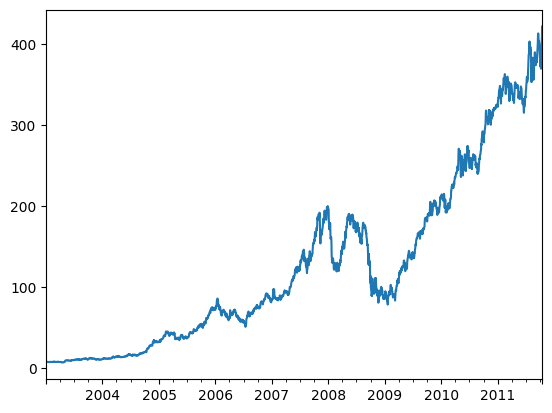

In [32]:
# 517
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px['AAPL'].plot()